In [1]:
from astropy.table import Table
import numpy as np
from matplotlib import pyplot as plt
from astropy import stats
import galaxy_model
%matplotlib inline

In [2]:
out = galaxy_model.galaxy_model(nstars = 500000)
out2 = out.copy()
out3 = out.copy()
for index, l in enumerate(out2["l"]):
    if l == 0 or l == 360:
        np.delete(out2, index)
    else:
        out2["l"][index] = l-360
for index, l in enumerate(out3["l"]):
    if l == 0 or l == 360:
        np.delete(out3, index)
    else:
        out3["l"][index] = l+360
out = np.append(out, out2)
out = np.append(out, out3)

#radial velocity vs distance color code by distance

In [28]:
cat = Table.read("apogeedata_bulge.fits.gz")
ages = Table.read("Sten_Ages.csv")
cat.add_column(0.0, name = "AGE")
# Remove trailing spaces
for i in range(len(cat)):
    cat['FIELD'][i] = cat['FIELD'][i].strip()
uniqueFields = np.unique(cat["FIELD"])
uniqueFields = uniqueFields[:182]
# adds ages
for index, ID in enumerate(ages["#APOGEE_ID"]):
    spot = np.where(ID == cat["APOGEE_ID"])
    cat["AGE"][spot] = float(ages["AGE"][index])
fastFields = ["002+04", "002+00", "001-01", "003-05", "005-03", "008+02", "010-02", "012-02", "014-02", "015+02", "016+02", "006+00", "340-10", "340+00", "345+00", "347+00", "350-04", "355+02", "355-02", "357+05", "358+06", "359+01"]

989


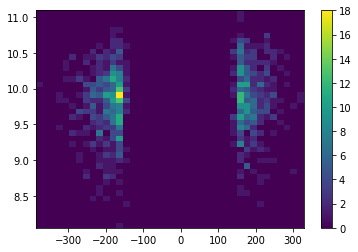

In [163]:
stars = 0
starAges = []
starVelocity = []
for field in uniqueFields:
    ind, = np.where((cat["FIELD"]==field) & (150<=abs(cat['VHELIO_AVG'])) & (cat["GAIA_PML"]<= 50) & (cat["GAIA_PML"] >= -50) & (cat["GAIA_PMB"] <= 50) & (cat["GAIA_PMB"] >= -50) & (cat["AGE"] != 0))
    data = cat[ind]
    velocities = data["VHELIO_AVG"]
    ages = data["AGE"]
    for AGE in ages:
        starAges.append(AGE)
    for VELOCITY in velocities:
        starVelocity.append(VELOCITY)
    stars += len(data["AGE"])
plt.hist2d(starVelocity, starAges, bins = 40)
plt.colorbar()
print(str(stars))

C:\Users\jakeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jakeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\jakeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\jakeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in greater_equal


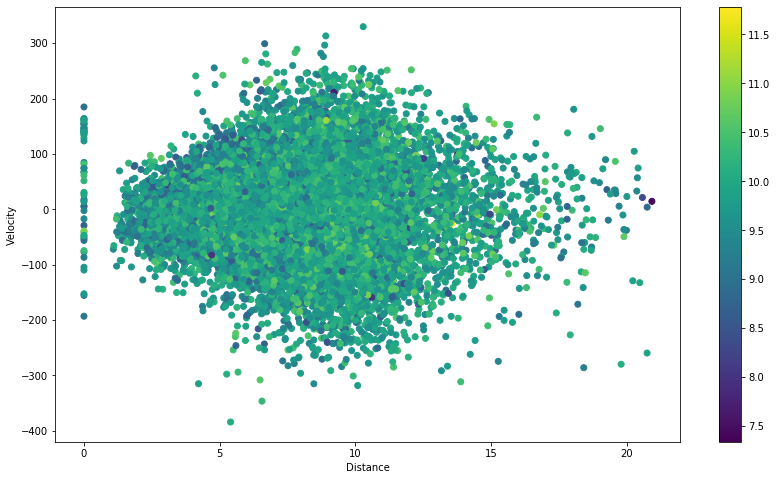

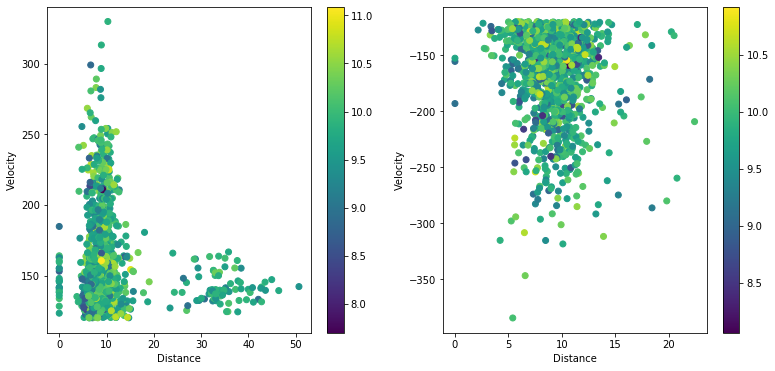

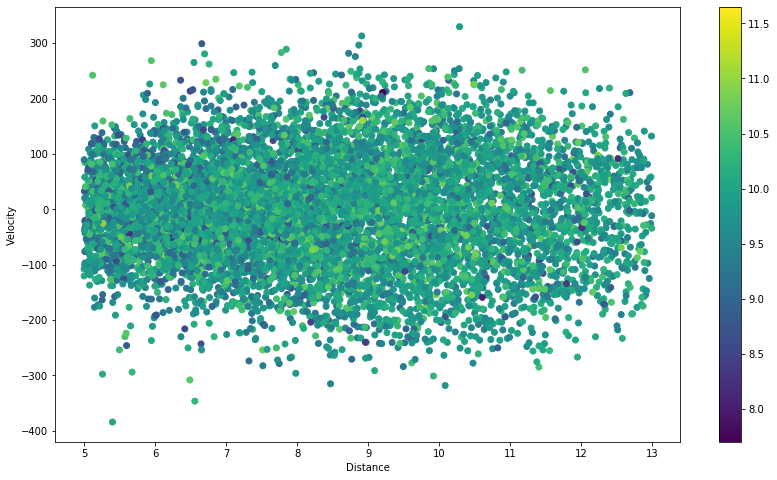

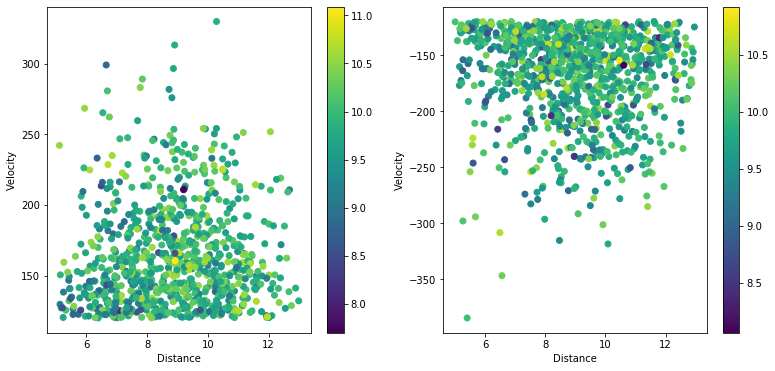

In [40]:
#graphs velocity vs distance color coded by age
plt.figure(figsize = (14,8))
plt.xlabel("Distance")
plt.ylabel("Velocity")
stardistances = []
starvelocities = []
starages = []
for index, Age in enumerate(cat["AGE"]):
    if Age != 0:
        if cat["DIST"][index] <= 21:
            stardistances.append(cat["DIST"][index])
            starvelocities.append(cat["VHELIO_AVG"][index])
            starages.append(Age)
plt.scatter(stardistances, starvelocities, c = starages)
plt.colorbar()

#graphs same as top but with limits on velocity
plt.subplots(1, 2, figsize = (13,6))
plt.subplot(1, 2, 1)
plt.xlabel("Distance")
plt.ylabel("Velocity")
stardistancesfpos = []
starvelocitiesfpos = []
staragesfpos = []
for index, Age in enumerate(cat["AGE"]):
    if Age != 0:
        if 120 <= cat["VHELIO_AVG"][index]:
            stardistancesfpos.append(cat["DIST"][index])
            starvelocitiesfpos.append(cat["VHELIO_AVG"][index])
            staragesfpos.append(Age)
plt.scatter(stardistancesfpos, starvelocitiesfpos, c = staragesfpos)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.xlabel("Distance")
plt.ylabel("Velocity")
stardistancesfneg = []
starvelocitiesfneg = []
staragesfneg = []
for index, Age in enumerate(cat["AGE"]):
    if Age != 0:
        if -120 >= cat["VHELIO_AVG"][index]:
            stardistancesfneg.append(cat["DIST"][index])
            starvelocitiesfneg.append(cat["VHELIO_AVG"][index])
            staragesfneg.append(Age)
plt.scatter(stardistancesfneg, starvelocitiesfneg, c = staragesfneg)
plt.colorbar()

#graphs same as top but with limits on distance instead of velocity
plt.figure(figsize = (14,8))
plt.xlabel("Distance")
plt.ylabel("Velocity")
stardistsquish = []
starvelsquish = []
staragesquish = []
for index, Age in enumerate(cat["AGE"]):
    if Age != 0:
        if 5 <= cat["DIST"][index] <= 13:
            stardistsquish.append(cat["DIST"][index])
            starvelsquish.append(cat["VHELIO_AVG"][index])
            staragesquish.append(Age)
plt.scatter(stardistsquish, starvelsquish, c = staragesquish)
plt.colorbar()

#graphs same as top but with limits on distance and velocity
plt.subplots(1, 2, figsize = (13,6))
plt.subplot(1, 2, 1)
plt.xlabel("Distance")
plt.ylabel("Velocity")
stardistsquishfpos = []
starvelsquishfpos = []
staragesquishfpos = []
for index, Age in enumerate(cat["AGE"]):
    if Age != 0:
        if 120 <= cat["VHELIO_AVG"][index]:
            if 5 <= cat["DIST"][index] <= 13:
                stardistsquishfpos.append(cat["DIST"][index])
                starvelsquishfpos.append(cat["VHELIO_AVG"][index])
                staragesquishfpos.append(Age)
plt.scatter(stardistsquishfpos, starvelsquishfpos, c = staragesquishfpos)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.xlabel("Distance")
plt.ylabel("Velocity")
stardistsquishfneg = []
starvelsquishfneg = []
staragesquishfneg = []
for index, Age in enumerate(cat["AGE"]):
    if Age != 0:
        if -120 >= cat["VHELIO_AVG"][index]:
            if 5 <= cat["DIST"][index] <= 13:
                stardistsquishfneg.append(cat["DIST"][index])
                starvelsquishfneg.append(cat["VHELIO_AVG"][index])
                staragesquishfneg.append(Age)
plt.scatter(stardistsquishfneg, starvelsquishfneg, c = staragesquishfneg)
plt.colorbar()

C:\Users\jakeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less_equal
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jakeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less_equal


4225
7602


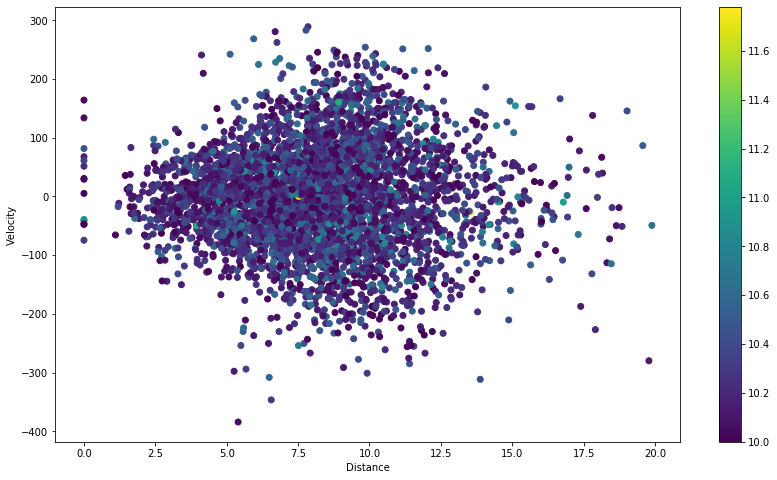

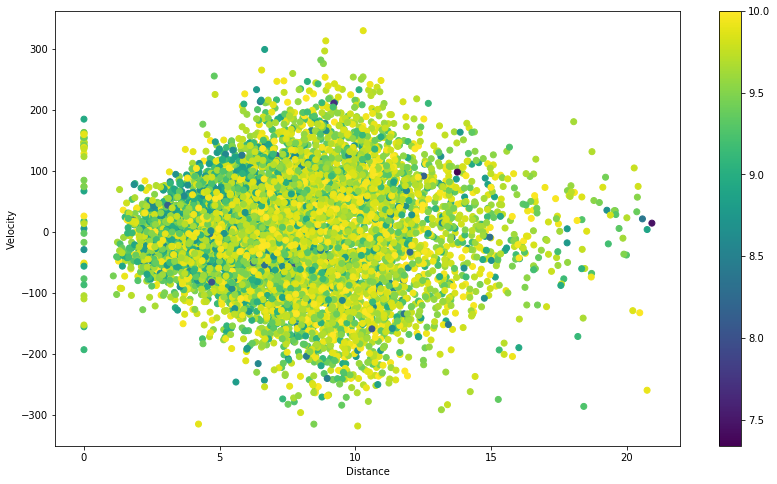

In [59]:
#graphs older stars
plt.figure(figsize = (14,8))
plt.xlabel("Distance")
plt.ylabel("Velocity")
ostardistances = []
ostarvelocities = []
ostarages = []
count = 0
for index, Age in enumerate(cat["AGE"]):
    if Age != 0 and Age >= 10:
        if cat["DIST"][index] <= 21:
            ostardistances.append(cat["DIST"][index])
            ostarvelocities.append(cat["VHELIO_AVG"][index])
            ostarages.append(Age)
            count += 1
print(str(count))
plt.scatter(ostardistances, ostarvelocities, c = ostarages)
plt.colorbar()

#graphs younger stars
plt.figure(figsize = (14,8))
plt.xlabel("Distance")
plt.ylabel("Velocity")
ystardistances = []
ystarvelocities = []
ystarages = []
count = 0
for index, Age in enumerate(cat["AGE"]):
    if Age != 0 and Age <= 10:
        if cat["DIST"][index] <= 21:
            ystardistances.append(cat["DIST"][index])
            ystarvelocities.append(cat["VHELIO_AVG"][index])
            ystarages.append(Age)
            count += 1
print(str(count))
plt.scatter(ystardistances, ystarvelocities, c = ystarages)
plt.colorbar()
# cbar = plt.colorbar()
# cbar.reverse()


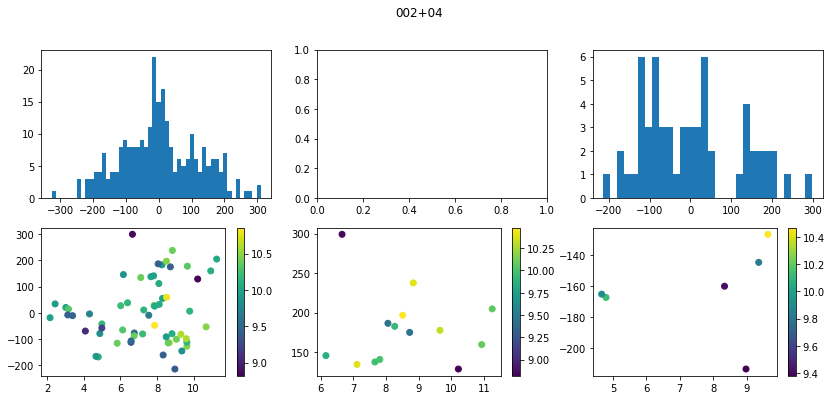

Total stars: 265
tal stars with ages: 59
Fast positive stars: 14
Fast negative stars: 6


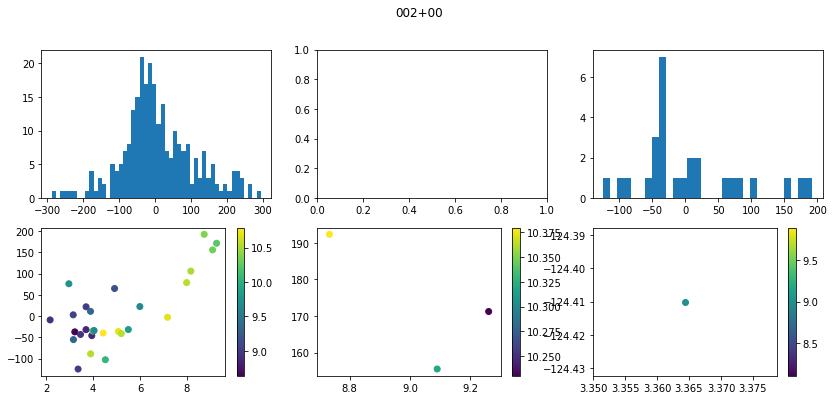

Total stars: 265
tal stars with ages: 27
Fast positive stars: 3
Fast negative stars: 1


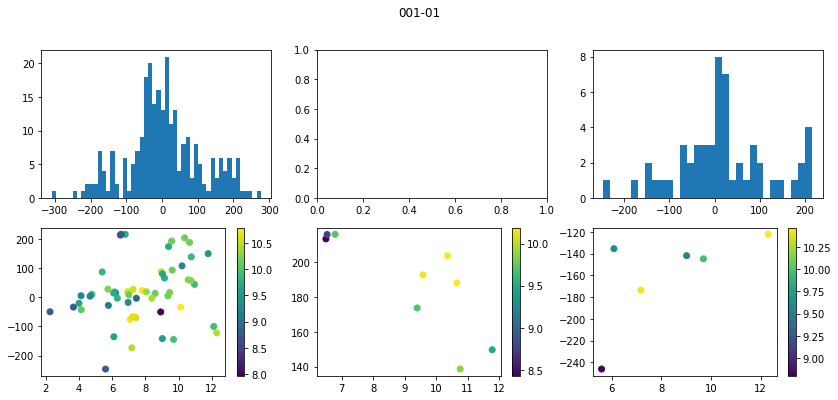

Total stars: 265
tal stars with ages: 54
Fast positive stars: 9
Fast negative stars: 6


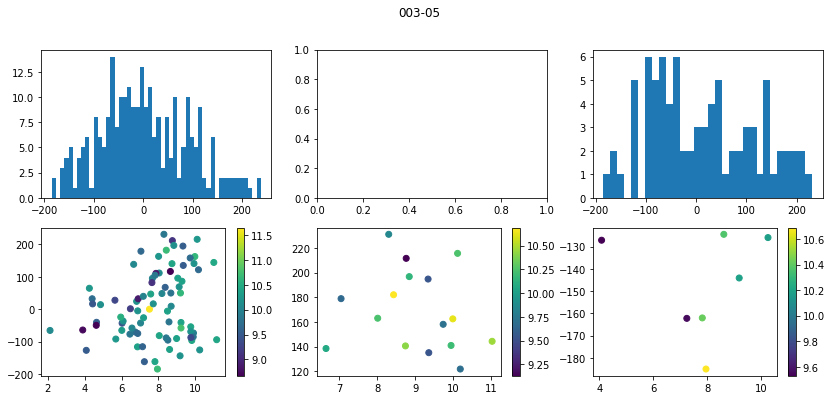

Total stars: 264
tal stars with ages: 82
Fast positive stars: 16
Fast negative stars: 7


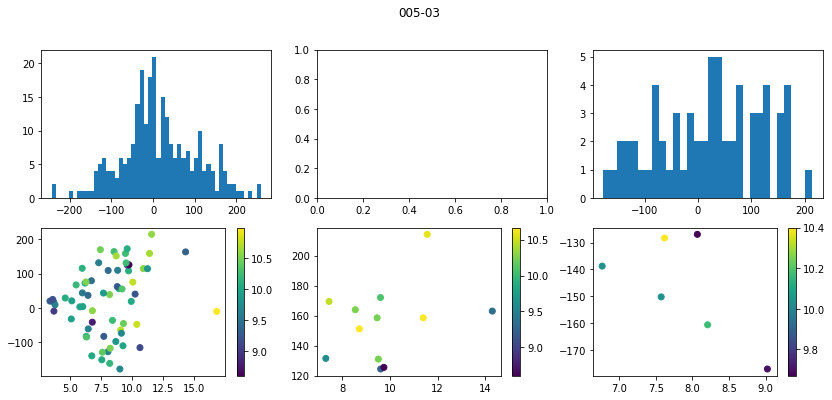

Total stars: 264
tal stars with ages: 64
Fast positive stars: 12
Fast negative stars: 6


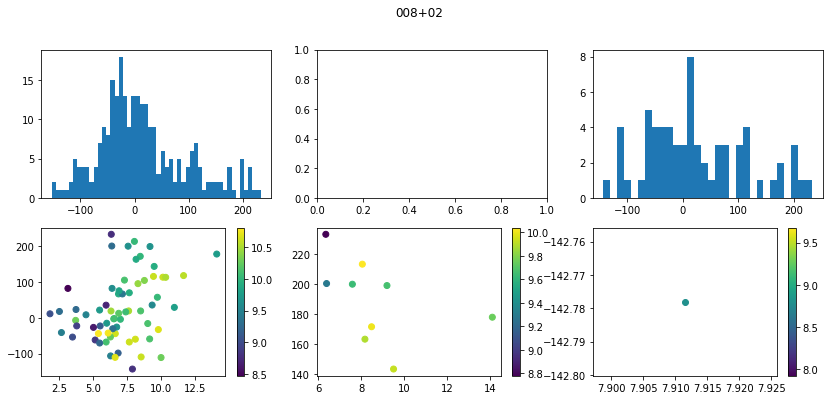

Total stars: 265
tal stars with ages: 66
Fast positive stars: 9
Fast negative stars: 1


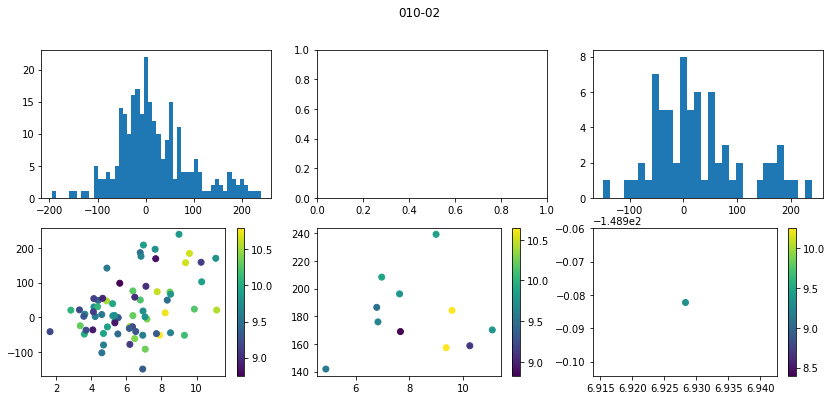

Total stars: 263
tal stars with ages: 70
Fast positive stars: 11
Fast negative stars: 1


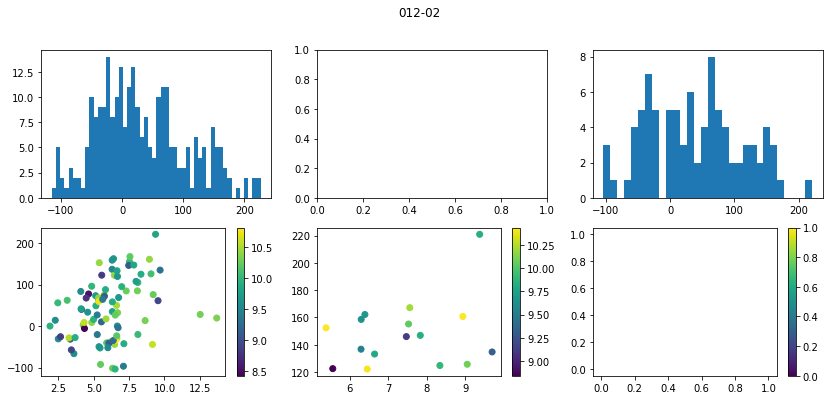

Total stars: 265
tal stars with ages: 89
Fast positive stars: 16
Fast negative stars: 0


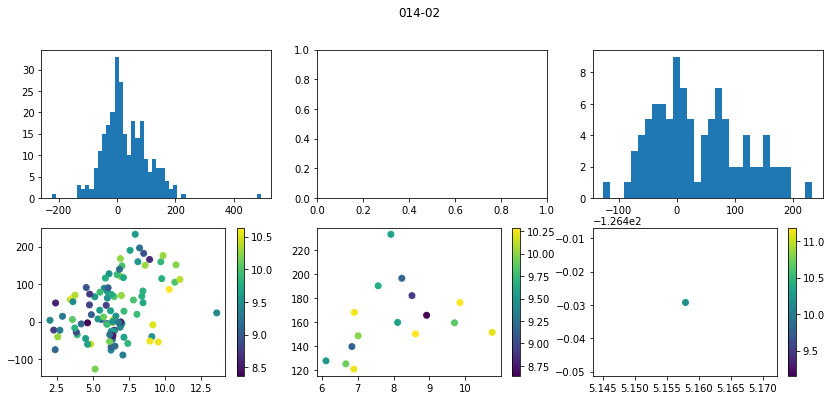

Total stars: 265
tal stars with ages: 97
Fast positive stars: 16
Fast negative stars: 1


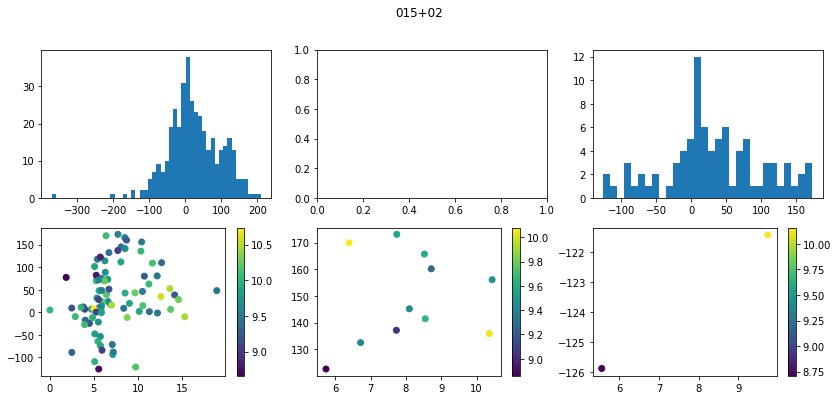

Total stars: 379
tal stars with ages: 86
Fast positive stars: 11
Fast negative stars: 2


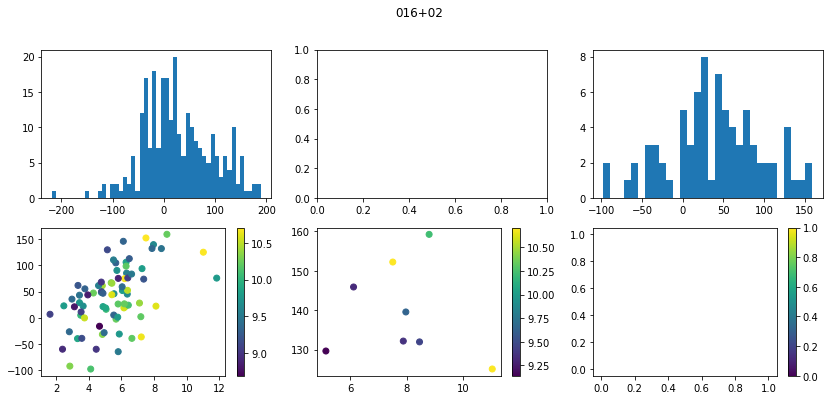

Total stars: 263
tal stars with ages: 78
Fast positive stars: 8
Fast negative stars: 0


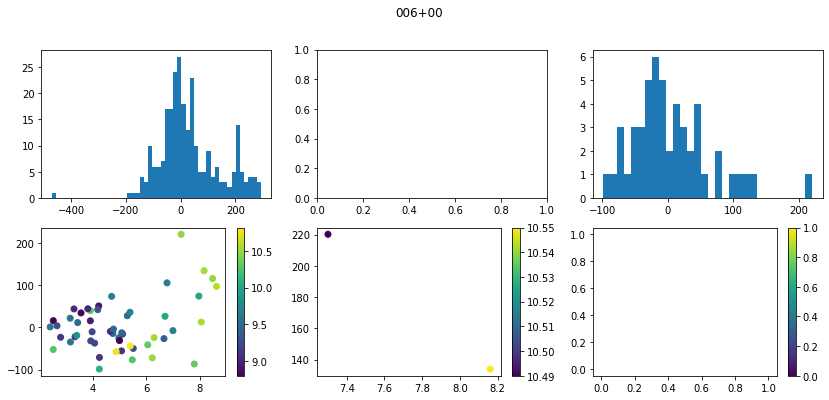

Total stars: 264
tal stars with ages: 51
Fast positive stars: 2
Fast negative stars: 0


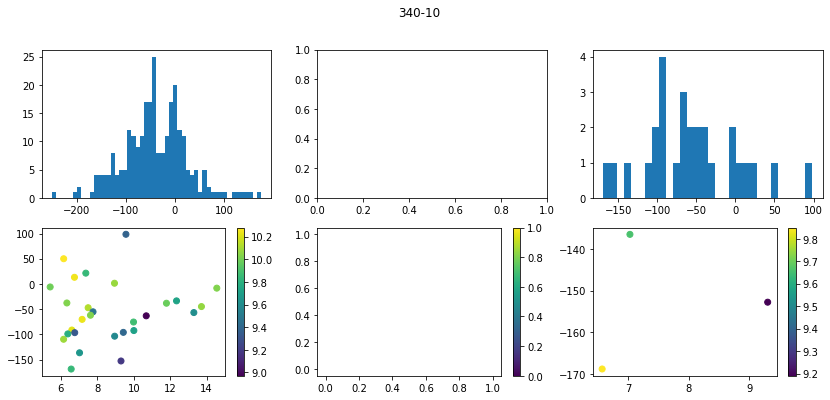

Total stars: 264
tal stars with ages: 28
Fast positive stars: 0
Fast negative stars: 3


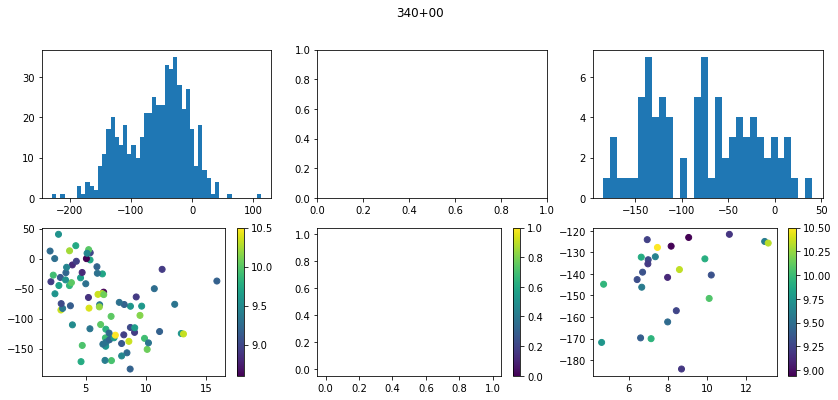

Total stars: 521
tal stars with ages: 83
Fast positive stars: 0
Fast negative stars: 26


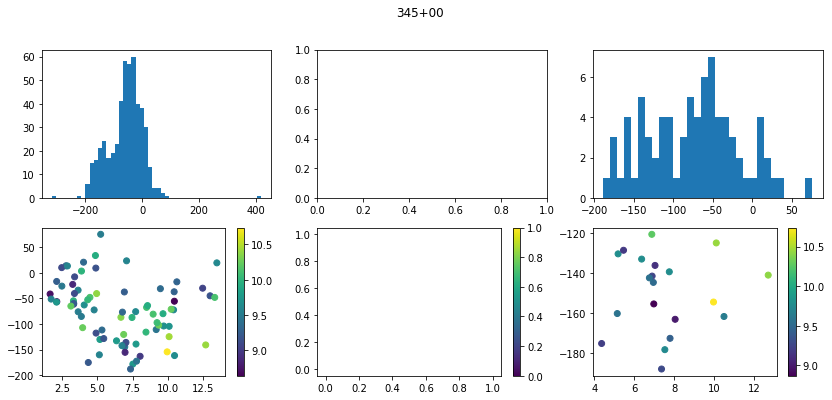

Total stars: 493
tal stars with ages: 78
Fast positive stars: 0
Fast negative stars: 20


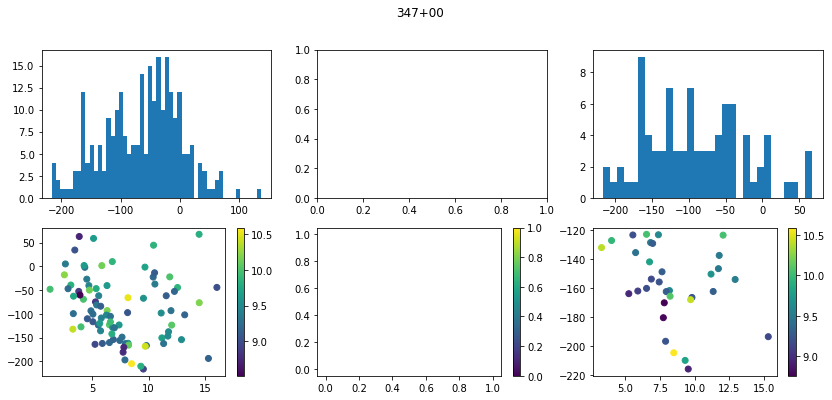

Total stars: 264
tal stars with ages: 87
Fast positive stars: 0
Fast negative stars: 33


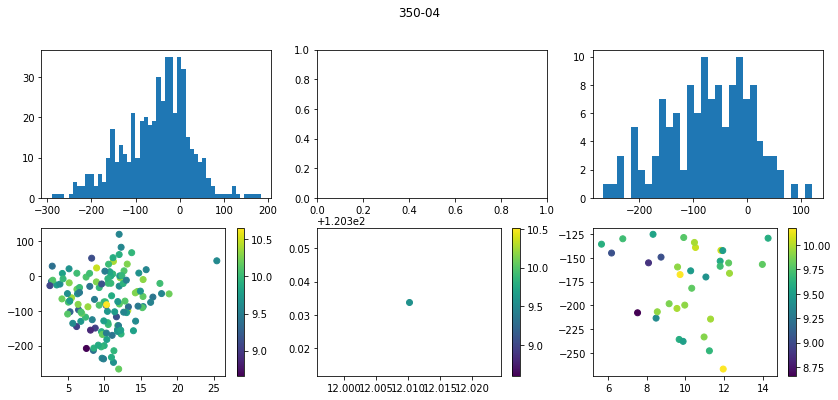

Total stars: 506
tal stars with ages: 127
Fast positive stars: 1
Fast negative stars: 34


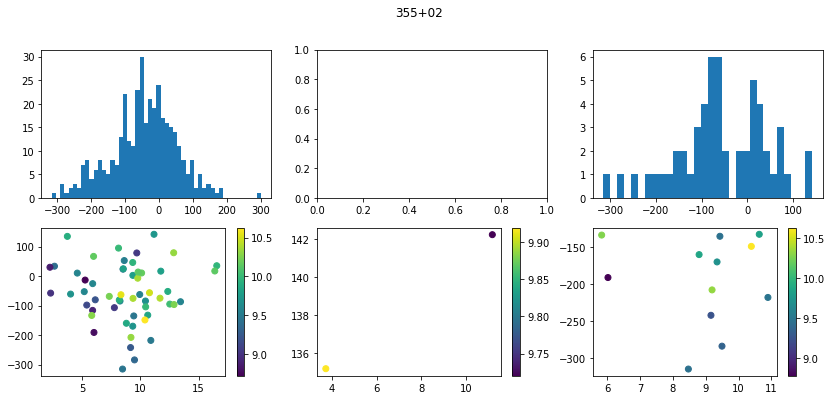

Total stars: 375
tal stars with ages: 55
Fast positive stars: 2
Fast negative stars: 12


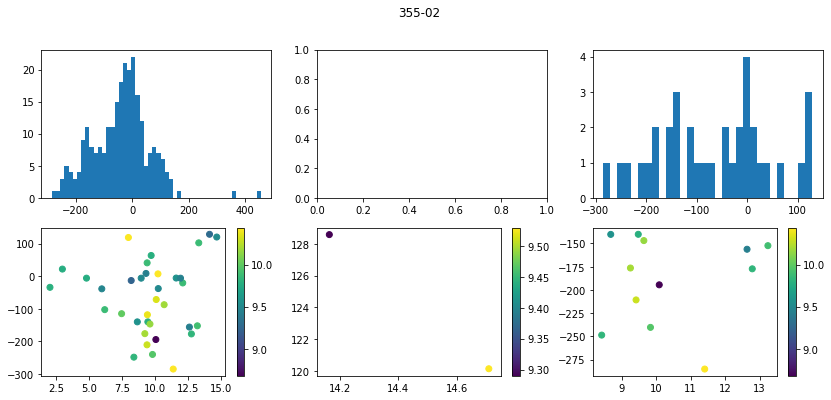

Total stars: 263
tal stars with ages: 35
Fast positive stars: 2
Fast negative stars: 12


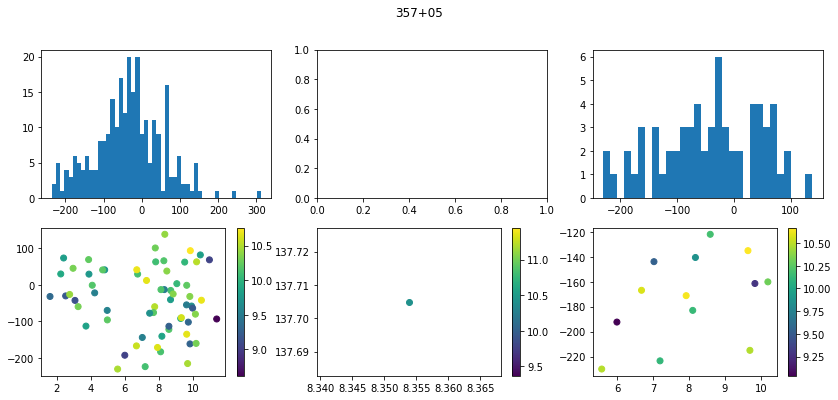

Total stars: 265
tal stars with ages: 64
Fast positive stars: 1
Fast negative stars: 13


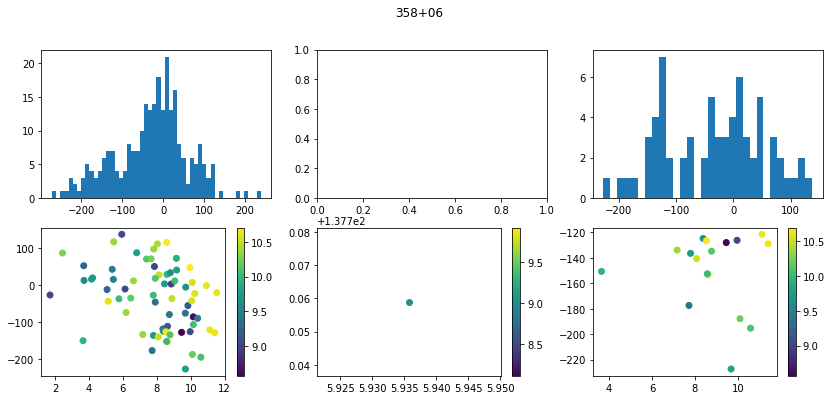

Total stars: 265
tal stars with ages: 68
Fast positive stars: 1
Fast negative stars: 17


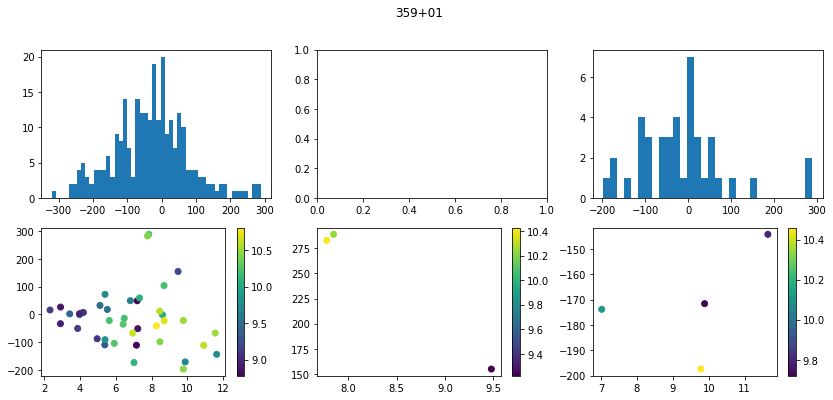

Total stars: 265
tal stars with ages: 41
Fast positive stars: 3
Fast negative stars: 4


In [31]:
for field in fastFields:
    ind2, = np.where(field == cat["FIELD"])
    ind, = np.where((field == cat["FIELD"]) & (abs(cat['VHELIO_AVG'])<500))
    data = cat[ind]
    plt.subplots(2, 3, figsize = (14,6))
    faststarspos = 0
    faststarsneg = 0
    totalstars = len(ind2)
    totalstarsage = 0
    
    plt.subplot(2, 3, 1)
    plt.hist(data["VHELIO_AVG"], bins = 50)

    plt.subplot(2, 3, 4)
    stardist = []
    starvel = []
    starage = []
    plt.suptitle(field)
    for line in data:
        if line["AGE"] != 0:
            stardist.append(line["DIST"])
            starvel.append(line["VHELIO_AVG"])
            starage.append(line["AGE"])
            totalstarsage += 1
            
    plt.scatter(stardist, starvel, c = starage)
    plt.colorbar()
    plt.subplot(2, 3, 3)
    plt.hist(starvel, bins = 30)
    
    plt.subplot(2, 3, 5)
    stardist = []
    starvel = []
    starage = []
    for line in data:
        if line["VHELIO_AVG"] >= 120 and line["AGE"] != 0:
            stardist.append(line["DIST"])
            starvel.append(line["VHELIO_AVG"])
            starage.append(line["AGE"])
            faststarspos += 1
    plt.scatter(stardist, starvel, c = starage)
    plt.colorbar()
    
    plt.subplot(2, 3, 6)
    stardist = []
    starvel = []
    starage = []
    for line in data:
        if line["VHELIO_AVG"] <= -120 and line["AGE"] != 0:
            stardist.append(line["DIST"])
            starvel.append(line["VHELIO_AVG"])
            starage.append(line["AGE"])
            faststarsneg += 1
    plt.scatter(stardist, starvel, c = starage)
    plt.colorbar()
    plt.show()
    print("Total stars: " + str(totalstars) + "\nTotal stars with ages: " + str(totalstarsage) + "\nFast positive stars: " + str(faststarspos) + "\nFast negative stars: " + str(faststarsneg))

In [42]:
totalstars = 0
agepos = 0
ageneg = 0
ageyoungpos = 0
ageoldpos = 0
ageyoungneg = 0
ageoldneg = 0
for line in cat:
    age = line["AGE"]
    vel = line["VHELIO_AVG"]
    dist = line["DIST"]
    totalstars += 1
    if age != 0:
        if vel >= 120:
            agepos += 1
            if age > 9.8:
                ageoldpos += 1
            else:
                ageyoungpos += 1
        elif vel <= -120:
            ageneg += 1
            if age > 9.8:
                ageoldneg += 1
            else:
                ageyoungneg += 1
print("Total stars: " + str(totalstars) + "\n\nPositive fast velocity data:")
print("Total ages: " + str(agepos) + "\nYoung stars: " + str(ageyoungpos) + "\nOld stars: " + str(ageoldpos) + "\n\nNegative fast velocity data:")
print("Total ages: " + str(ageneg) + "\nYoung stars: " + str(ageyoungneg) + "\nOld stars: " + str(ageoldpos))
        

Total stars: 74295

Positive fast velocity data:
Total ages: 1038
Young stars: 496
Old stars: 542

Negative fast velocity data:
Total ages: 1106
Young stars: 501
Old stars: 542


In [41]:
total = 0
lines = 0
for line in cat:
    age = line["AGE"]
    if age != 0:
        total += age
        lines += 1
average = total/lines
print(str(average))

9.803781519715695
